In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [30]:
DATA = pd.read_excel('/Users/21car/Downloads/Animated_Tv_Series.xlsx')
print(DATA.head())

   Id                     Title  Episodes       Year  Original channel  \
0   1             2 Stupid Dogs      26.0  1993-1995               TBS   
1   2           3-2-1 Penguins!      27.0  2000-2008   Direct to video   
2   3                   3-South      13.0  2002-2003               MTV   
3   4  3Below: Tales of Arcadia      28.0  2018-2019           Netflix   
4   5                3rd & Bird      51.0  2008-2010  Playhouse Disney   

                      American company                   Note    Technique  \
0                        Hanna-Barbera                    NaN  Traditional   
1                 Big Idea Productions                    NaN          CGI   
2  Warner Bros. AnimationMTV Animation                    NaN  Traditional   
3      DreamWorks Animation Television                    NaN          CGI   
4          Little Airplane Productions  British co-production        Flash   

   IMDb  Google users  
0   7.2          0.91  
1   6.5          0.91  
2   8.0       

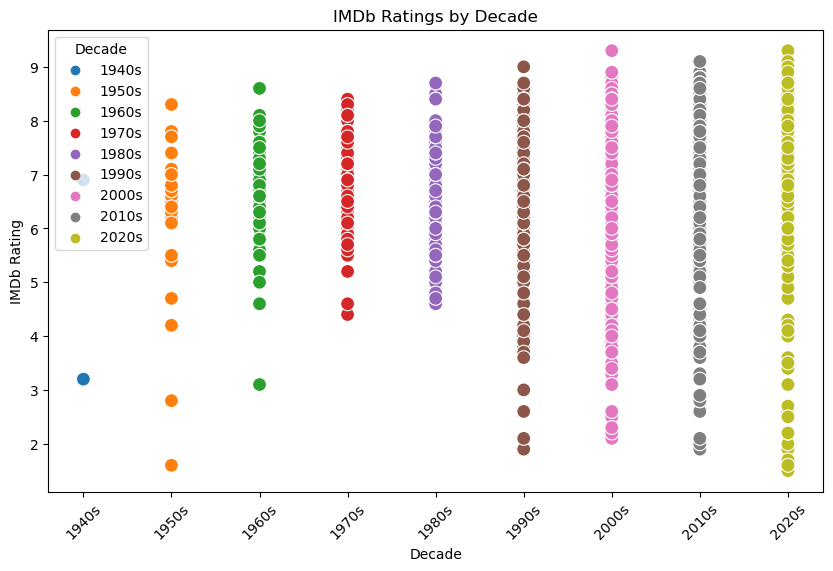

In [35]:
# Ensure the 'Year' column is treated as a string
DATA['Year'] = DATA['Year'].astype(str)

# Extract the first year mentioned in the 'Year' column using a regex
DATA['Start_Year'] = DATA['Year'].str.extract('(\d{4})').astype(float)  # Extracting and converting to float to handle NaN

# Drop any rows where Start_Year could not be determined (if any)
DATA.dropna(subset=['Start_Year'], inplace=True)

# Convert Start_Year to int (now that NaNs are handled)
DATA['Start_Year'] = DATA['Start_Year'].astype(int)

# Determine the decade from the start year
DATA['Decade'] = (DATA['Start_Year'] // 10 * 10).astype(str) + 's'

# Categorize into decades for potential ordering in plots or analysis
decades = ['1940s', '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', '2020s']
DATA['Decade'] = pd.Categorical(DATA['Decade'], categories=decades, ordered=True)

# Plotting
plt.figure(figsize=(10, 6))
scatter_plot = sns.scatterplot(data=DATA, x='Decade', y='IMDb', hue='Decade', palette='tab10', s=100)
plt.title('IMDb Ratings by Decade')
plt.xlabel('Decade')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)
plt.legend(title='Decade')
plt.show()

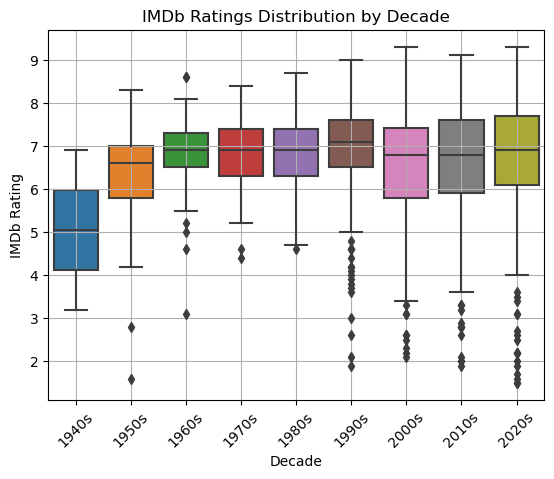

In [36]:
boxplot = sns.boxplot(data=DATA, x='Decade', y='IMDb', palette='tab10')
plt.title('IMDb Ratings Distribution by Decade')
plt.xlabel('Decade')
plt.ylabel('IMDb Rating')
plt.xticks(rotation=45)  # Rotate labels to improve readability
plt.grid(True)  # Adding a grid for better visibility of values
plt.show()

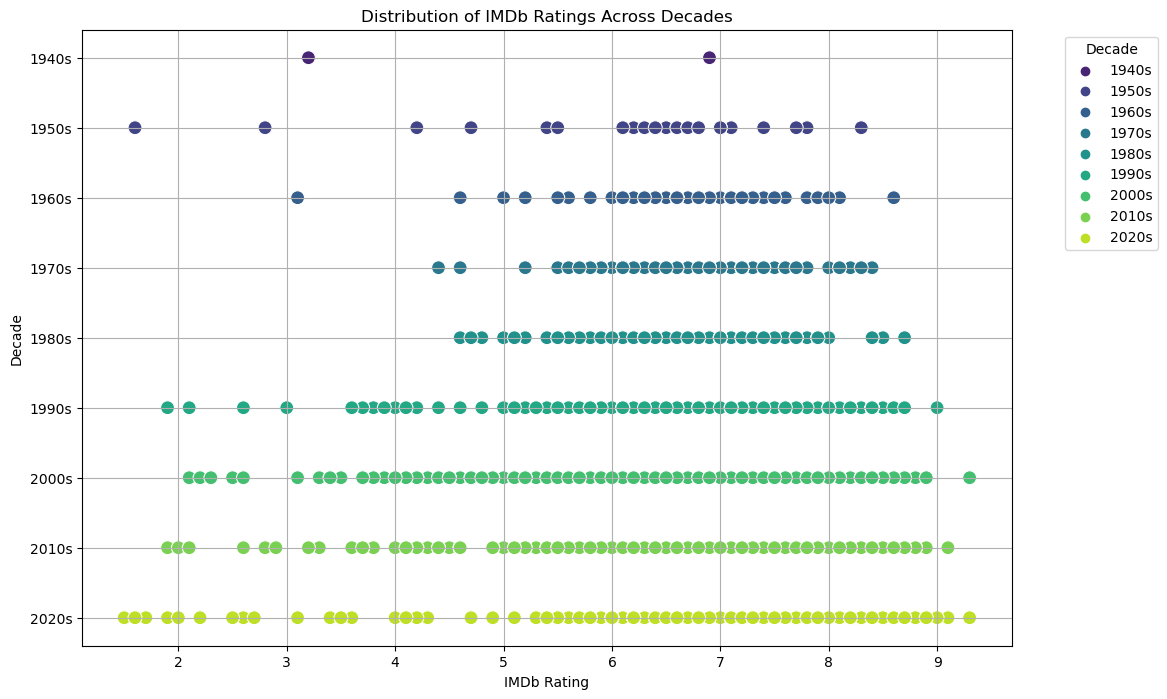

In [37]:
plt.figure(figsize=(12, 8))
scatter_plot = sns.scatterplot(data=DATA, x='IMDb', y='Decade', hue='Decade', palette='viridis', s=100)
plt.title('Distribution of IMDb Ratings Across Decades')
plt.xlabel('IMDb Rating')
plt.ylabel('Decade')
plt.grid(True)  # Adding a grid for better visibility of points
plt.legend(title='Decade', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend out of the plot
plt.show()